# 1.Collect Data and Import Data

In [1]:
import pandas as pd

In [2]:
def load_data():
    train_set = pd.read_csv('Video_games_esrb_rating.csv')
    test_set = pd.read_csv('test_esrb.csv')
    return train_set,test_set

In [3]:
train_set,test_set = load_data()

In [4]:
train_set.sample(5)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
1541,Out Of Ammo,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T
86,Taxi Chaos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
1688,911 Operator,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,T
858,Headlander,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
127,Untitled Goose Game,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


# 2.Data Clensing and Exploration

In [29]:
for col in train_set:
    print(col,' : ',train_set[col].unique())
    print()

title  :  ['Monster Jam Steel Titans 2' 'Subnautica: Below Zero'
 'NIER REPLICANT VER.1.22474487139…' ... 'SPARC' 'Still Time'
 'Surf World Series']

console  :  [1 0]

alcohol_reference  :  [0 1]

animated_blood  :  [0 1]

blood  :  [0 1]

blood_and_gore  :  [0 1]

cartoon_violence  :  [0 1]

crude_humor  :  [0 1]

drug_reference  :  [0 1]

fantasy_violence  :  [0 1]

intense_violence  :  [0 1]

language  :  [0 1]

lyrics  :  [0 1]

mature_humor  :  [0 1]

mild_blood  :  [0 1]

mild_cartoon_violence  :  [0 1]

mild_fantasy_violence  :  [0 1]

mild_language  :  [0 1]

mild_lyrics  :  [0 1]

mild_suggestive_themes  :  [0 1]

mild_violence  :  [0 1]

no_descriptors  :  [1 0]

nudity  :  [0 1]

partial_nudity  :  [0 1]

sexual_content  :  [0 1]

sexual_themes  :  [0 1]

simulated_gambling  :  [0 1]

strong_janguage  :  [0 1]

strong_sexual_content  :  [0 1]

suggestive_themes  :  [0 1]

use_of_alcohol  :  [0 1]

use_of_drugs_and_alcohol  :  [0 1]

violence  :  [0 1]

esrb_rating  :  ['E' 

## Dimension Checking

In [55]:
train_set.shape # 1895 Games and 33 Features 1 Label

(1895, 34)

In [56]:
test_set.shape # 500 Games and 33 Features 1 Label

(500, 34)

## Data Type Checking

In [57]:
train_set.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_janguage              int64
strong_sexual_conten

In [58]:
test_set.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_janguage              int64
strong_sexual_conten

## Class Checking 

Class Remark
- T = Teen
- E = Everyone
- ET = Everyone 10+
- M = Mature 17+

<AxesSubplot:title={'center':'Train Set Class'}>

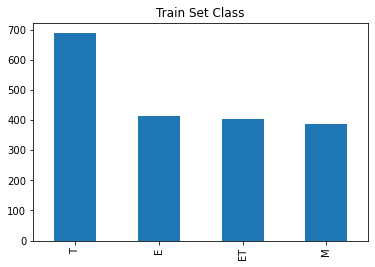

In [59]:
train_set['esrb_rating'].value_counts().plot(kind='bar',title='Train Set Class')

In [60]:
train_set['esrb_rating'].value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

<AxesSubplot:title={'center':'Test Set Class'}>

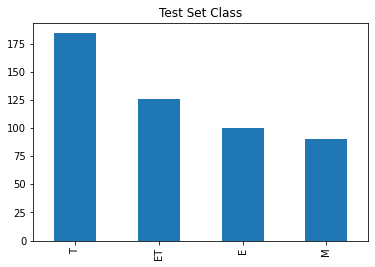

In [61]:
test_set['esrb_rating'].value_counts().plot(kind='bar',title='Test Set Class')

In [62]:
test_set['esrb_rating'].value_counts()

T     184
ET    126
E     100
M      90
Name: esrb_rating, dtype: int64

## Null Value Checking

In [63]:
train_set.isnull().sum() # No Null Value Problem

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [64]:
test_set.isna().sum() # No Null Value Problem

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

## Shuffle Data

In [29]:
def data_preprocessing(df) :   
  # Shuffle the data
  df = df.sample(frac=1.0, random_state=41).reset_index(drop=True)

In [30]:
data_preprocessing(train_set)
data_preprocessing(test_set)

# 3. Feature Extraction

In [147]:
def Feature_Extraction(df):
    label = df['esrb_rating']
    label = df['esrb_rating'].map({ "E" :0, "ET" : 1 , "T" : 2 , "M" : 3}) # แปลง Class ให้เป็นตัวเลข
    feature = df.drop(['title','esrb_rating','console'], axis=1)
    feature = feature._get_numeric_data()
    return feature,label

In [148]:
train_feature,train_label = Feature_Extraction(train_set)

In [149]:
test_feature,test_label = Feature_Extraction(test_set)

In [150]:
train_label

0       1
1       3
2       3
3       2
4       3
       ..
1890    2
1891    0
1892    3
1893    3
1894    2
Name: esrb_rating, Length: 1895, dtype: int64

# 4.Training Model

## Random Forest

In [151]:
def RandomForest_Training_Model(feature,label):
    from sklearn.ensemble import RandomForestClassifier

    RF_Model = RandomForestClassifier(  max_depth=10,random_state=41,criterion='entropy',n_estimators=40,oob_score=True,                                                     max_features=0.5,min_samples_leaf=10)

    clf_RF_model = RF_Model.fit(feature,label)

    return clf_RF_model

In [152]:
ESRB_RF_Model = RandomForest_Training_Model(train_feature,train_label)

In [153]:
# RF Feature Improtance
feat_imp = pd.DataFrame()
feat_imp['feat_name'] = train_feature.columns
feat_imp['score'] = ESRB_RF_Model.feature_importances_
feat_imp.sort_values(by='score', ascending=False)

,feat_name,score
25,strong_janguage,0.202346
19,no_descriptors,0.183991
3,blood_and_gore,0.143585
2,blood,0.135719
7,fantasy_violence,0.116110
14,mild_fantasy_violence,0.066119
30,violence,0.022349
8,intense_violence,0.022235
27,suggestive_themes,0.021184
24,simulated_gambling,0.020716


# 5.Evaluation

In [154]:
ESRB_RF_Prediction = ESRB_RF_Model.predict(test_feature)

In [155]:
def Model_Performace_Score(y_actual,y_predict):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    
    DT_Accuracy = accuracy_score(y_actual,y_predict)
    DT_Precision = precision_score(y_actual,y_predict,average='macro')
    DT_Recall =recall_score(y_actual,y_predict,average='macro')

    return DT_Accuracy,DT_Precision,DT_Recall

In [156]:
Model_Performace_Score(test_label,ESRB_RF_Prediction)

(0.768, 0.8024771795546471, 0.7633712905452036)

# Create ML Model Pipline

In [157]:
def Create_model_pipline():
    #Get data
    train_set,test_set = load_data()

    # Data Cleansing
    data_preprocessing(train_set)
    data_preprocessing(test_set)
       
    #Feature Extraction
    train_feature,train_label = Feature_Extraction(train_set)
    test_feature,test_label = Feature_Extraction(test_set)
    
    #Train Model
    ESRB_RF_Model = RandomForest_Training_Model(train_feature,train_label) # Random Forest
    
    #Predection
    ESRB_RF_Prediction = ESRB_RF_Model.predict(test_feature)

    # Evaluation
    Perfomanance = Model_Performace_Score(test_label,ESRB_RF_Prediction)

    return Perfomanance

In [158]:
Create_model_pipline()

(0.76, 0.800516689070906, 0.7535584886128365)

# Save Model as Joblib

In [159]:
import joblib

In [160]:
joblib.dump(ESRB_RF_Model,'ESRB_RF.model')

['ESRB_RF.model']